# Raw analytics - Social media User Analysis

analise dos dados brutos da camada bronze

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df_raw = pd.read_csv('dados_brutos.csv')

# Dados faltando ou vazios 

In [8]:
missing_values = pd.DataFrame({
    'coluna': df_raw.columns,
    'nulos': df_raw.isnull().sum(),
    'vazios': (df_raw == '').sum(),
    'total': df_raw.isnull().sum() + (df_raw == '').sum(),
    'percentual': (df_raw.isnull().sum() + (df_raw == '').sum()) / len(df_raw) * 100
})
if not missing_values.empty:
    print("Não foram encontrados valores ausentes.")
else:
    missing_values = missing_values.sort_values(by='percentual', ascending=False)
    missing_values

Não foram encontrados valores ausentes.


# Grafico de paises que mais usam a rede social instagram 

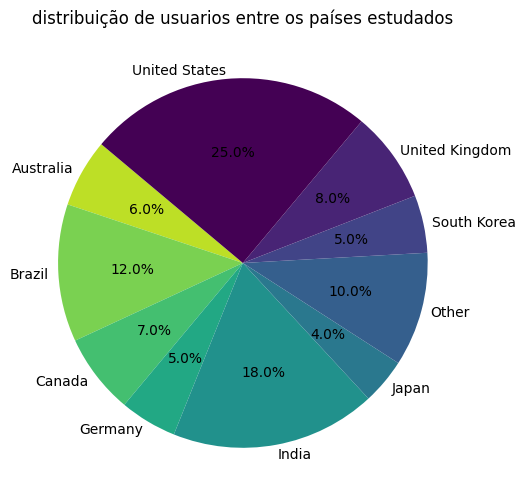

In [26]:
paises_count = df_raw.groupby('country').country.count()
plt.figure(figsize=(10,6))
plt.pie(paises_count, autopct='%1.1f%%', startangle=140,labels= paises_count.index,colors = plt.cm.viridis(np.linspace(0.9, 0, 10)), labeldistance=1.05)
plt.title('distribuição de usuarios entre os países estudados')
plt.show()

# Dados de relação entre idade dos usuarios e exercios fisico 

C:\Users\Dell\AppData\Local\Temp\ipykernel_11824\456150890.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  exer_por_idd = df_raw.groupby('age_group')['exercise_hours_per_week'].mean()


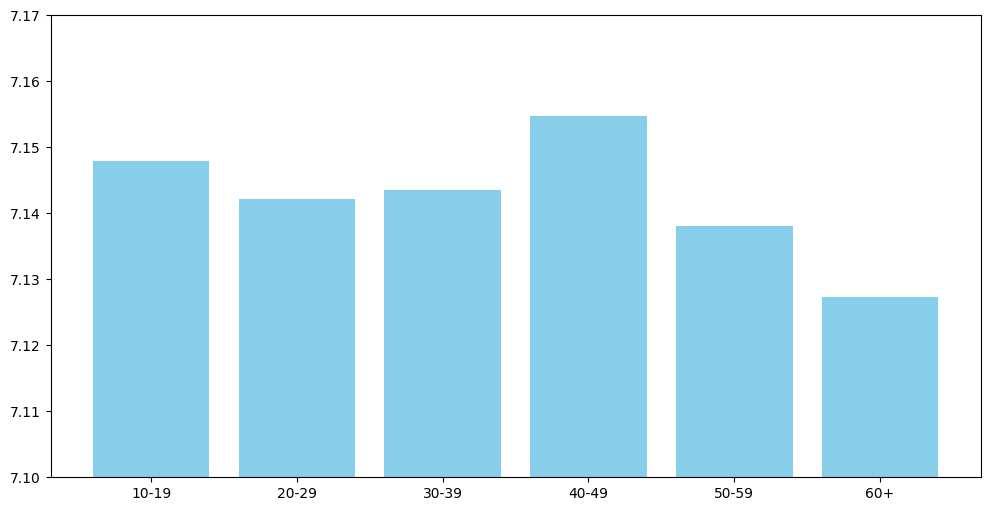

In [ ]:
plt.figure(figsize=(12,6))
bins = [10,20,30,40,50,60,70]
labels = ['10-19','20-29','30-39','40-49','50-59','60+']
df_raw['age_group'] = pd.cut(df_raw['age'], bins=bins, labels=labels)
exer_por_idd = df_raw.groupby('age_group')['exercise_hours_per_week'].mean()
plt.bar(exer_por_idd.index,exer_por_idd.values, color='skyblue',)
plt.ylim(7.10,7.17)
plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_11824\3698742238.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  idd_seden = df_raw.groupby('age_group')['seden_total'].count()
C:\Users\Dell\AppData\Local\Temp\ipykernel_11824\3698742238.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  idd_total = df_raw.groupby('age_group')['exercise_hours_per_week'].count()


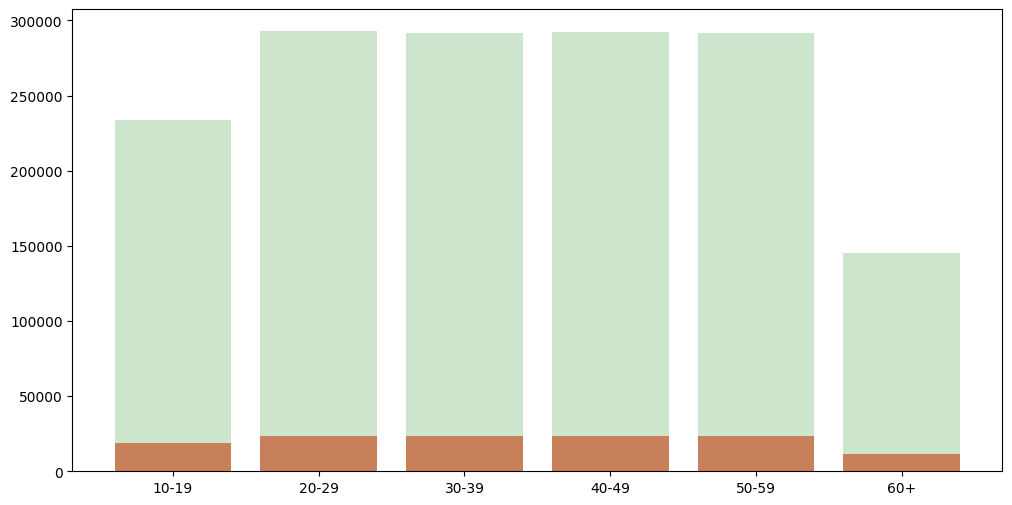

In [55]:
plt.figure(figsize=(12,6))
df_raw['seden'] = df_raw['exercise_hours_per_week'] <= 2
df_raw['seden_total'] = df_raw[df_raw['seden'] == True]['exercise_hours_per_week']
idd_seden = df_raw.groupby('age_group')['seden_total'].count() 
plt.bar(idd_seden.index, idd_seden.values, color='salmon')
idd_total = df_raw.groupby('age_group')['exercise_hours_per_week'].count()
plt.bar(idd_total.index, idd_total.values, color='green', alpha=0.2)
plt.show()